In [1]:
import csv
import os
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt

In [2]:
def open_file(path):
    total = {}
    with open(path) as csvDataFile:
        csvReader = csv.reader(csvDataFile)
        for row in csvReader:
            raw_data = str(row).replace(" ", "")
            # print(raw_data)
            if int(raw_data[2])*10 + int(raw_data[3]) == 29:
                (key, value) = convert_data(raw_data)
                total[key] = value
    return total

In [3]:
def convert_data(raw_data):
    ans = {}
    day = int(raw_data[2])*10 + int(raw_data[3])
    hour = int(raw_data[4])*10 + int(raw_data[5])
    minute = int(raw_data[6])*10 + int(raw_data[7])
    time = str(day) + ":" + str(hour) + ":" + str(minute)
    if raw_data[9] == ".":
        ans = int(raw_data[8])
    else:
        ans = int(raw_data[8])*10 + int(raw_data[9])
    return time, ans

In [4]:
def check(dict_in):
    start_time = "29:1:10"
    end_time = "29:12:20"
    pos = 0
    list_in = copy.copy(list(dict_in))
    for i in list_in[:]:
        pos = pos + 1
        if i == start_time:
            delete_pos = pos-1
            for i in range(0, delete_pos):
                del dict_in[list_in[i]]
        if i == end_time:
            delete_pos = pos+1
            for i in range(delete_pos-1, len(list_in)):
                del dict_in[list_in[i]]
    return dict_in

In [5]:
def reshape(data, title):
    df = pd.DataFrame({title:np.array(list(data.values()))}, index = np.array(list(data.keys())))
    df.index = pd.to_datetime(df.index, format = '%d:%H:%M')
    if title == "FT3_092_2":
        df = df.resample('5min').mean()
    elif title == "萬興國小":
        df = df.resample('30min').mean()
    elif title == "木柵國小":
        df = df.resample('30min').mean()
    return df

In [6]:
path1 = '/Users/heng/Desktop/FT3_092_2.csv'
path2 = '/Users/heng/Desktop/28C2DDDD4354.csv'
path3 = '/Users/heng/Desktop/28C2DDDD423C.csv'
id_1 = open_file(path1)
id_2 = open_file(path2)
id_3 = open_file(path3)

In [7]:
# print(id_1)

In [8]:
# print(id_2)

In [9]:
# print(id_3)

In [10]:
id_1_done = check(id_1)
id_2_done = check(id_2)
id_3_done = check(id_3)

In [11]:
# print(id_1_done)
# print(id_2_done)
# print(id_3_done)

In [12]:
df1 = reshape(id_1_done, "FT3_092_2")
df2 = reshape(id_2_done, "木柵國小")
df3 = reshape(id_3_done, "萬興國小")

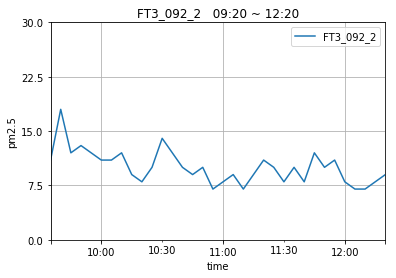

In [20]:
df1 = df1.astype(float)
df1.plot()
label_y = np.linspace(0, 30, 5)
plt.yticks(label_y)
plt.title('FT3_092_2   09:20 ~ 12:20')
plt.grid(True)
plt.xlabel("time") 
plt.ylabel("pm2.5")
plt.savefig('FT3_092_2')
plt.show()

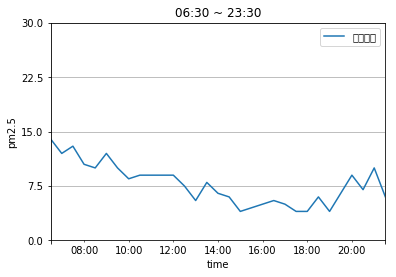

In [21]:
df2 = df2.astype(float)
df2 = df2.interpolate()
df2.plot()
label_y = np.linspace(0, 30, 5)
plt.yticks(label_y)
plt.title('06:30 ~ 23:30')
plt.grid(True)
plt.xlabel("time") 
plt.ylabel("pm2.5")
plt.savefig('木柵國小')
plt.show()

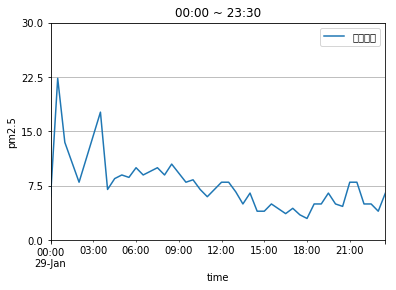

In [22]:
df3 = df3.astype(float)
df3 = df3.interpolate()
df3.plot()
label_y = np.linspace(0, 30, 5)
plt.yticks(label_y)
plt.title('00:00 ~ 23:30')
plt.grid(True)
plt.xlabel("time")
plt.ylabel("pm2.5")
plt.savefig('萬興國小')
plt.show()